# Developing Staff Promotion Algorithm

> **CASE STUDY: YAKUB TRADING GROUP ALGORITHMIC STAFF PROMOTION**   

<img src = 'in.jpg'>

## Objectives:

1. Analyze the data and see the different variables that can affect an employees promotion
2. Build a predictive model to determine the employees that are likely to be promoted

# Exploratory Data Analysis

#### Importing the libraries for the analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('All libraries imported')

All libraries imported


# Settings (Optional)

In [2]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)


#### Loading the Dataset

In [3]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


### Data Description and Exploratory Visualisations

> There, I will provide data visualizations that summarizes or extracts relevant characteristics of features in our dataset. Let's look at each column in detail, get a better understanding of the dataset, and group them together when appropriate.

In [4]:
# Dataset columns
dataset.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')

In [5]:
#data size
dataset.shape

(38312, 19)

In [6]:
# Dataset header
dataset.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


> The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details, as well as performance.

### Checking for missing values

In [7]:
#Summing the missing values in the data
dataset.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

> The data provided has 1679 missing values in the Qualification .

In [8]:
# let's see the different qualifications we have
dataset.Qualification.value_counts()

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

In [28]:
# Getting the summary statistics of the data
dataset.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


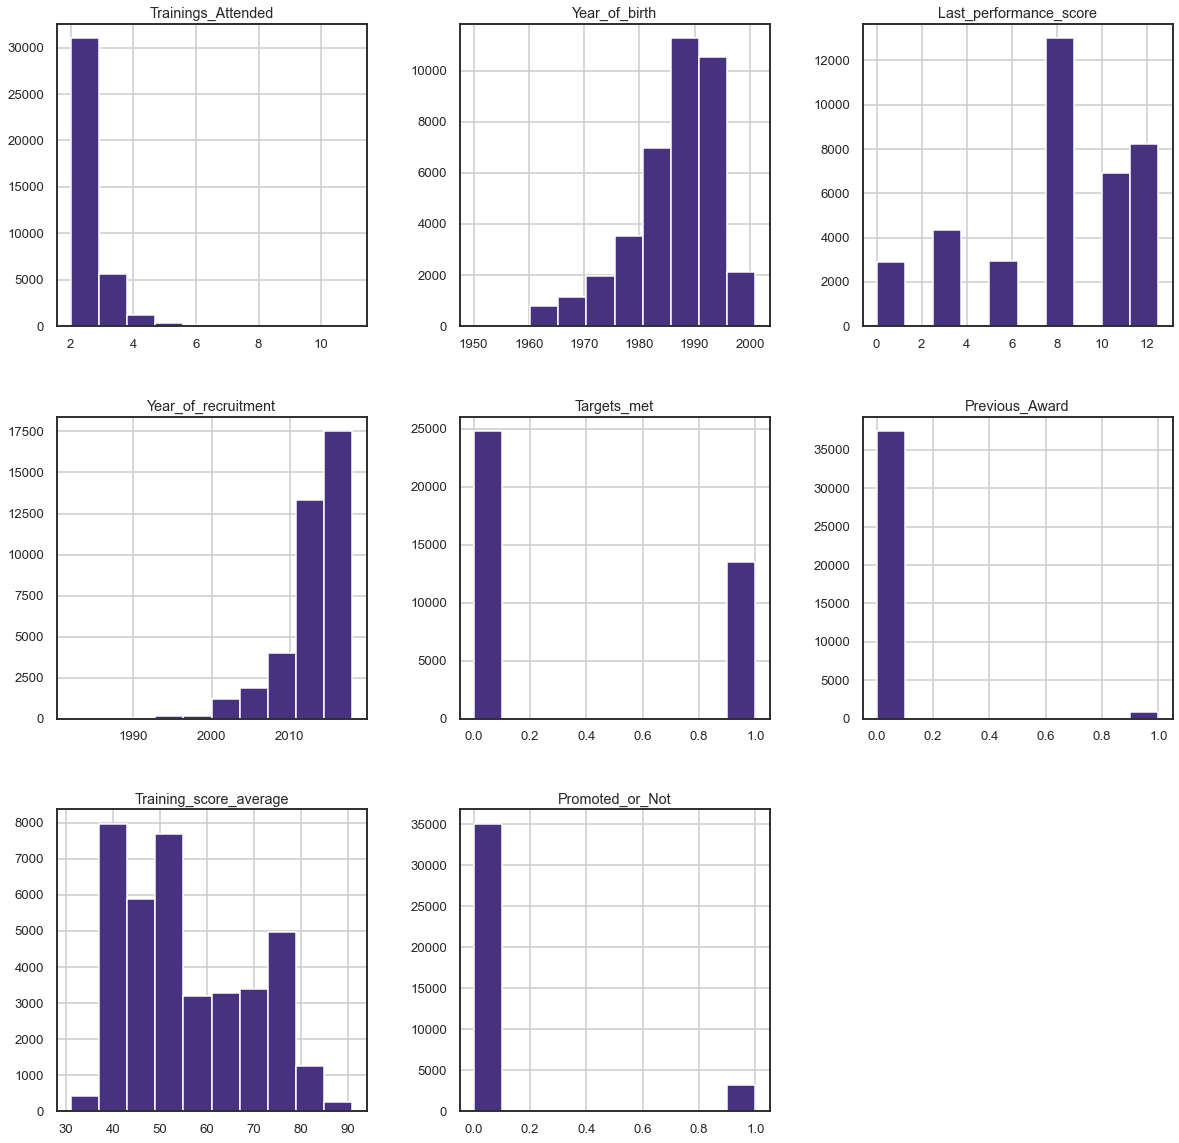

In [30]:
dataset.hist(figsize=(20,20))
plt.show()

> From the above visualization, we can understand that it is only 'Training_score_average' column that is capable
of determining whether an employee would be promoted or not, so we note that down and take some time to visualize
the non-numeric variables

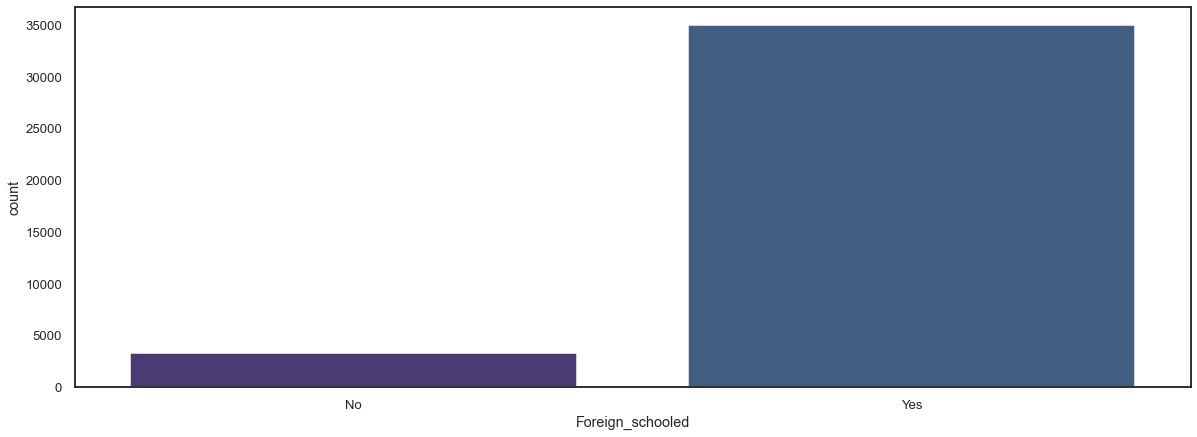

In [35]:
sns.countplot('Foreign_schooled',data = dataset)
plt.show()

In [36]:
dataset.Foreign_schooled.value_counts()

Yes    34995
No      3317
Name: Foreign_schooled, dtype: int64

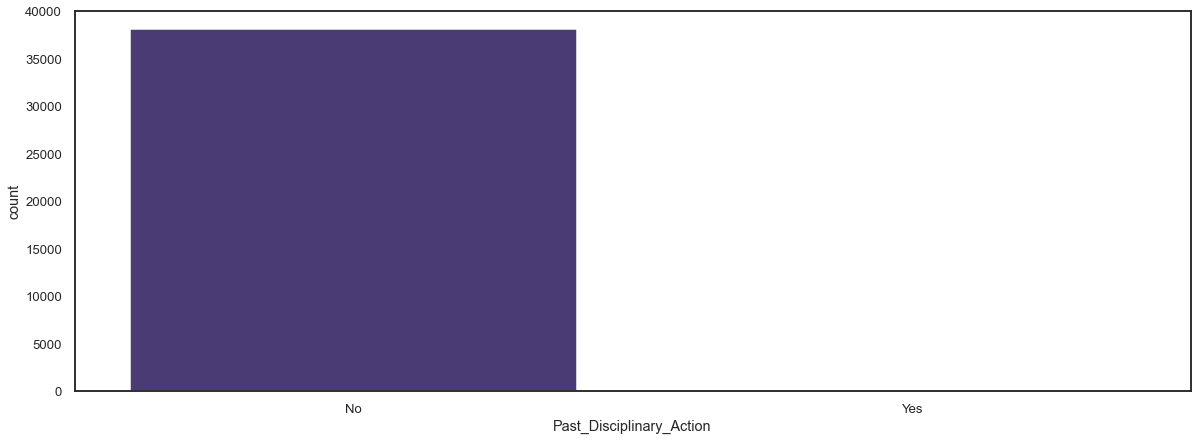

In [38]:
sns.countplot('Past_Disciplinary_Action',data=dataset)
plt.show()

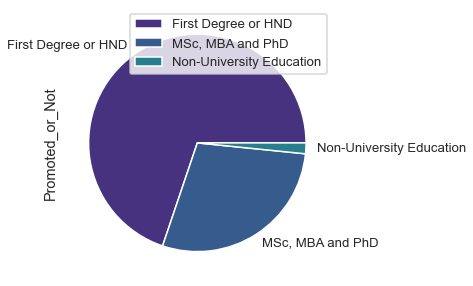

In [39]:
# Creating a pie chart to count employee by Qualification
df_qualification = dataset.groupby(['Qualification']).count()[['Promoted_or_Not']]
df_qualification.head()
df_qualification.plot.pie(y='Promoted_or_Not', figsize=(5, 5))
plt.legend(loc = 0)
plt.show()

> We can see some interesting things about some of the non-numeric variables, but for us to be able to
perform any analysis on those variables without sentiments, we have to encode them into integers

In [40]:
print("Percentage of Promoted Employees is {:.1f}% and non-promoted employees is: {:.1f}%".format(
    dataset[dataset['Promoted_or_Not'] == 1].shape[0] / dataset.shape[0]*100,
    dataset[dataset['Promoted_or_Not'] == 0].shape[0] / dataset.shape[0]*100))

Percentage of Promoted Employees is 8.5% and non-promoted employees is: 91.5%


In [42]:
dataset.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


> As shown on the chart above, we see this is an imbalanced class problem. Indeed, the percentage of unpromoted Employees in our dataset is 91.5% and the percentage of promoted is: 8.5%

### Encoding the non-numeric variables

In [45]:
# Encoading the categorical variables
from sklearn import preprocessing
#creating label encoader
le = preprocessing.LabelEncoder()


In [46]:
#converting string lables into numbers
dataset['Marital_Status']=le.fit_transform(dataset['Foreign_schooled'])

dataset['Foreign_schooled']=le.fit_transform(dataset['Foreign_schooled'])

dataset['Past_Disciplinary_Action']=le.fit_transform(dataset['Past_Disciplinary_Action'])

dataset['Previous_IntraDepartmental_Movement']=le.fit_transform(dataset['Previous_IntraDepartmental_Movement'])

dataset['No_of_previous_employers']=le.fit_transform(dataset['No_of_previous_employers'])

dataset['Division']=le.fit_transform(dataset['Division'])

dataset['Gender']=le.fit_transform(dataset['Gender'])

dataset['Channel_of_Recruitment']=le.fit_transform(dataset['Channel_of_Recruitment'])

dataset['State_Of_Origin']=le.fit_transform(dataset['State_Of_Origin'])


In [47]:
dataset.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,1,"MSc, MBA and PhD",0,1,2,1986,12.5,2011,1,0,41,3,0,0,0,0,0,0
1,YAK/S/00002,2,First Degree or HND,1,0,2,1991,12.5,2015,0,0,52,3,1,1,0,0,0,0
2,YAK/S/00003,1,First Degree or HND,1,1,2,1987,7.5,2012,0,0,42,20,1,1,0,0,0,0
3,YAK/S/00004,1,First Degree or HND,1,0,3,1982,2.5,2009,0,0,42,26,1,1,0,0,1,0
4,YAK/S/00006,4,First Degree or HND,1,1,3,1990,7.5,2012,0,0,77,2,1,1,0,0,1,0


In [48]:
dataset.drop('Qualification', axis=1, inplace=True)

In [49]:
dataset.head()

,EmployeeNo,Division,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,1,0,1,2,1986,12.5,2011,1,0,41,3,0,0,0,0,0,0
1,YAK/S/00002,2,1,0,2,1991,12.5,2015,0,0,52,3,1,1,0,0,0,0
2,YAK/S/00003,1,1,1,2,1987,7.5,2012,0,0,42,20,1,1,0,0,0,0
3,YAK/S/00004,1,1,0,3,1982,2.5,2009,0,0,42,26,1,1,0,0,1,0
4,YAK/S/00006,4,1,1,3,1990,7.5,2012,0,0,77,2,1,1,0,0,1,0


### Correlation

> Let's take a look at some of most significant correlations. It is worth remembering that correlation coefficients only measure linear correlations.

In [50]:
dataset.corr()

,Division,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
Division,1.000000,-0.107572,-0.003205,0.022635,-0.016845,0.027623,-0.004005,0.043780,0.004503,0.487098,-0.000955,-0.003430,-0.003430,-0.004048,0.004342,0.000813,0.015582
Gender,-0.107572,1.000000,0.008076,0.084906,0.012095,-0.023586,0.017644,-0.038382,0.001773,-0.024311,-0.002833,0.016073,0.016073,0.012799,-0.002715,0.004717,-0.010437
Channel_of_Recruitment,-0.003205,0.008076,1.000000,-0.011279,0.031744,0.025190,0.019725,0.019151,-0.003005,0.009362,0.001632,-0.002931,-0.002931,-0.003240,-0.003799,0.000612,0.006324
Trainings_Attended,0.022635,0.084906,-0.011279,1.000000,0.078710,-0.062042,0.056215,-0.044789,-0.007409,0.041065,0.010643,-0.005108,-0.005108,-0.002260,-0.005871,0.000796,-0.024345
Year_of_birth,-0.016845,0.012095,0.031744,0.078710,1.000000,-0.175572,0.654666,0.025337,0.013627,0.048390,0.000531,-0.001877,-0.001877,-0.000251,0.011412,-0.003117,0.017991
Last_performance_score,0.027623,-0.023586,0.025190,-0.062042,-0.175572,1.000000,-0.190333,0.276350,0.026587,0.057836,0.000386,-0.001923,-0.001923,-0.003065,-0.005478,-0.005428,0.119690
Year_of_recruitment,-0.004005,0.017644,0.019725,0.056215,0.654666,-0.190333,1.000000,0.076910,0.041995,0.037477,0.003785,-0.000253,-0.000253,0.003217,0.004988,-0.003550,0.012287
Targets_met,0.043780,-0.038382,0.019151,-0.044789,0.025337,0.276350,0.076910,1.000000,0.092934,0.077201,0.000604,-0.004294,-0.004294,-0.000264,-0.002965,-0.003308,0.224518
Previous_Award,0.004503,0.001773,-0.003005,-0.007409,0.013627,0.026587,0.041995,0.092934,1.000000,0.072360,0.001590,0.002960,0.002960,-0.001374,-0.009762,0.003887,0.201434
Training_score_average,0.487098,-0.024311,0.009362,0.041065,0.048390,0.057836,0.037477,0.077201,0.072360,1.000000,-0.004252,0.000796,0.000796,-0.006620,-0.000237,0.008194,0.178448


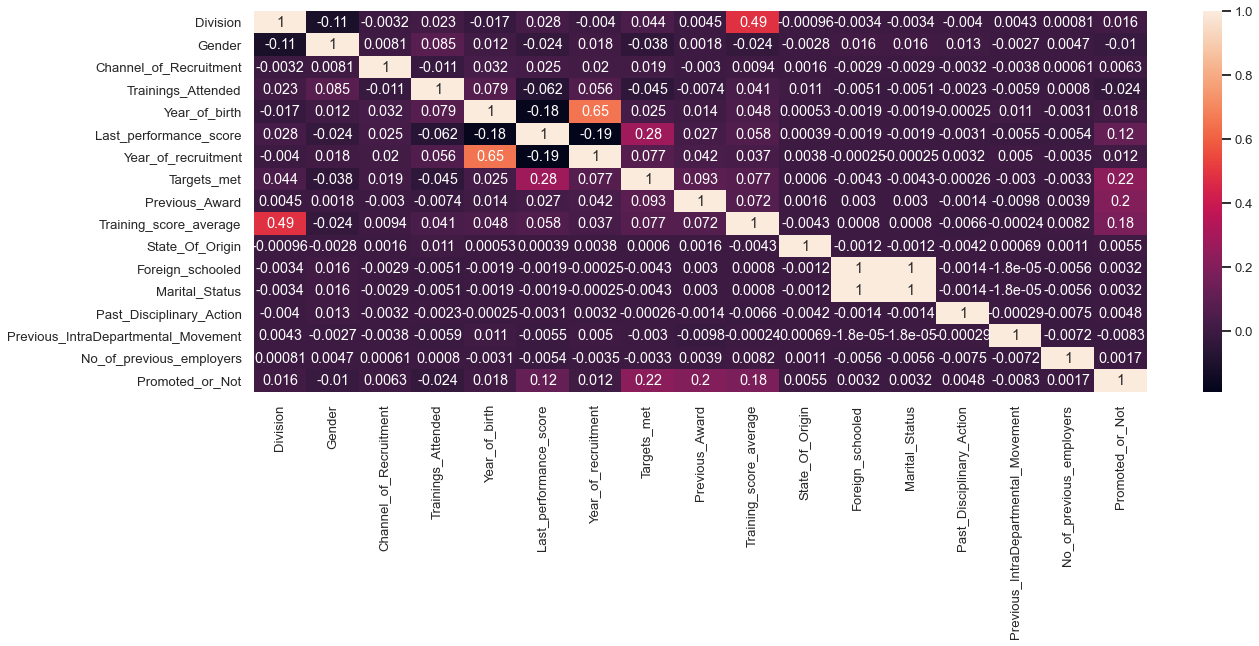

In [51]:
sns.heatmap(dataset.corr(), annot=True)
plt.show()

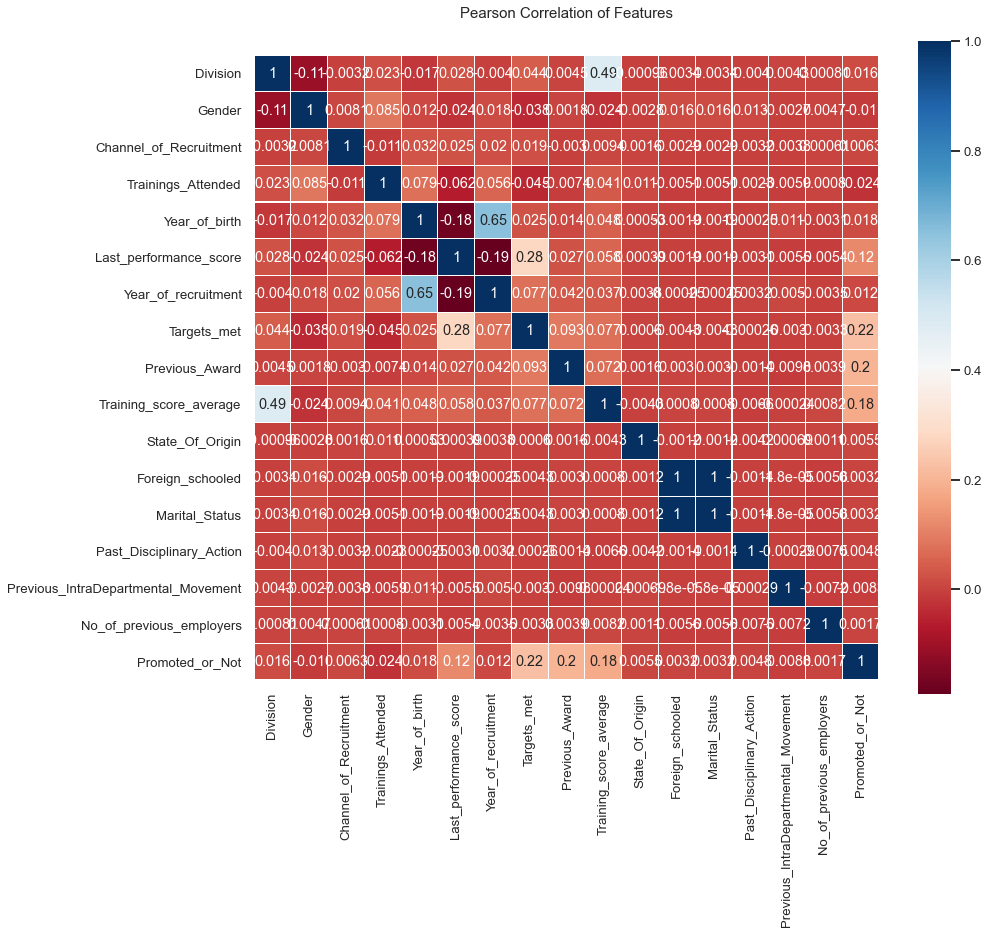

In [58]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(dataset.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

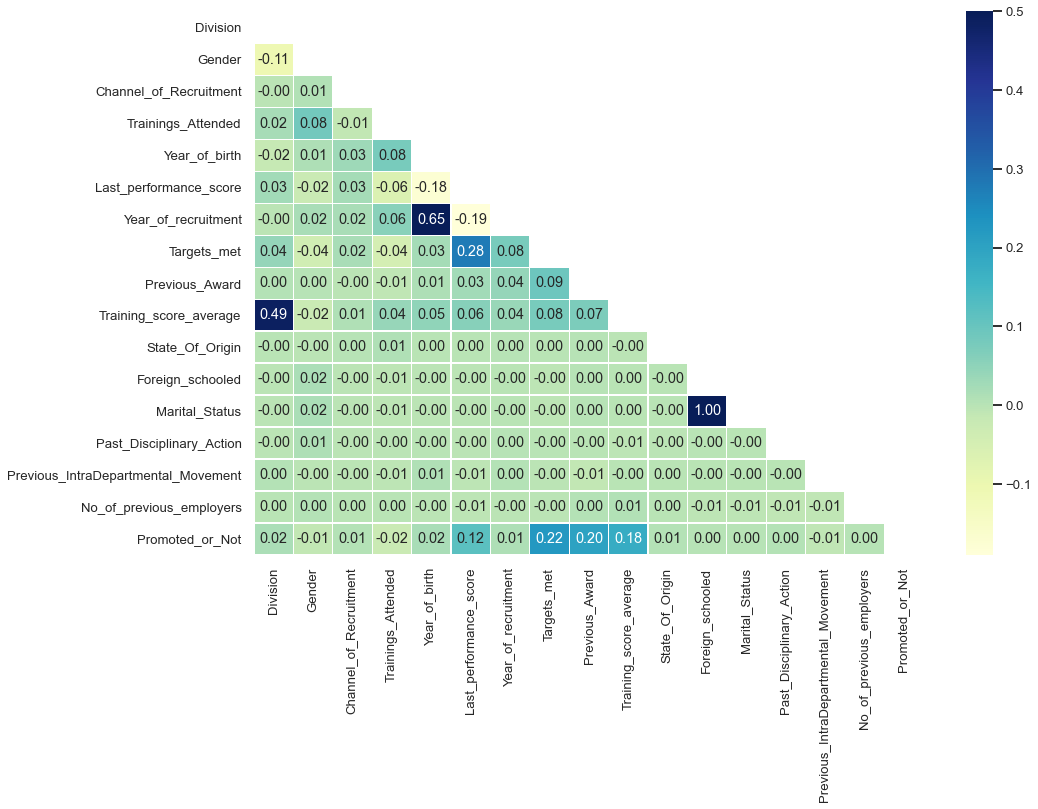

In [54]:
# Calculate correlations
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
             annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")
plt.show()

> As shown above, many of the variables are positively correlated to the column 'Promoted_or_Not'

In [59]:
# Find correlations with the target and sort
correlations = dataset.corr()['Promoted_or_Not'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 Last_performance_score    0.119690
Training_score_average    0.178448
Previous_Award            0.201434
Targets_met               0.224518
Promoted_or_Not           1.000000
Name: Promoted_or_Not, dtype: float64

Most Negative Correlations: 
 Trainings_Attended                    -0.024345
Gender                                -0.010437
Previous_IntraDepartmental_Movement   -0.008289
No_of_previous_employers               0.001690
Foreign_schooled                       0.003202
Name: Promoted_or_Not, dtype: float64


### EDA Concluding Remarks

Let's summarise the findings from this EDA: <br>

> - The dataset only feature one missing or erroneous data values, with all features in their correct data type. <br>
- The strongest positive correlations with the target features are: **Last_performance_score**, **Training_score_average**, **Previous_Award**, **Targets_met**. 
- The strongest negative correlations with the target features are: **Trainings_Attended**, **Gender**, **Previous_IntraDepartmental_Movement**, **No_of_previous_employers **, and **Foreign_schooled** .
- The dataset is **imbalanced** with the majoriy of observations describing unpromoted employees. <br>
- Several features (ie columns) are redundant for our analysis, namely: Qualification, EmployeeID, Year, and Gender. <br>

Other observations include: <br>

- 

<img src = 'b.jpg'>

## Feature Selection

In [61]:
dataset.columns

Index(['EmployeeNo', 'Division', 'Gender', 'Channel_of_Recruitment',
       'Trainings_Attended', 'Year_of_birth', 'Last_performance_score',
       'Year_of_recruitment', 'Targets_met', 'Previous_Award',
       'Training_score_average', 'State_Of_Origin', 'Foreign_schooled',
       'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')

In [62]:
features = dataset[['Division', 'Gender','Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers']]
target = dataset['Promoted_or_Not']

## optional

[0.10779381 0.01738946 0.03287144 0.0275274  0.12306725 0.05769836
 0.10067554 0.04849852 0.03850856 0.23230947 0.12757852 0.0047444
 0.00480172 0.00170974 0.01116717 0.06365865]


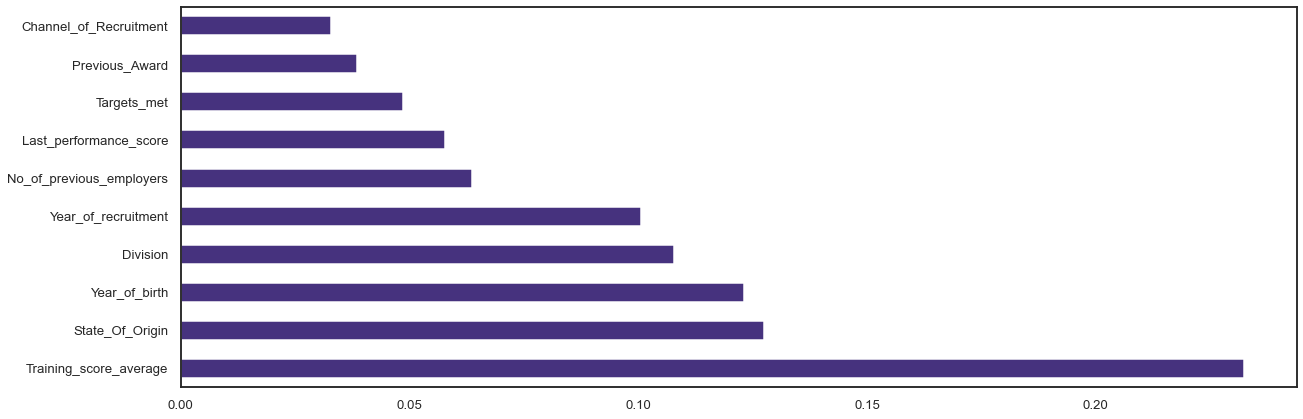

In [64]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(features,target)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=features.columns)
feat_importance.nlargest(10).plot(kind = 'barh')
plt.show()

In [65]:
target = dataset['Promoted_or_Not']
features = dataset[['Training_score_average','Last_performance_score','Division']]

### Splitting data into training and testing sets

> Prior to implementating or applying any Machine Learning algorithms, we must decouple training and testing datasets from our master dataframe.

In [66]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

In [67]:
features_train,features_test,target_train,target_test = train_test_split(features,target, test_size = 0.2, random_state = 0)

In [68]:
features_train

,Training_score_average,Last_performance_score,Division
14599,52,12.5,6
4,77,7.5,4
28190,66,10.0,8
10683,69,7.5,3
10970,72,2.5,8
...,...,...,...
20757,63,2.5,8
32103,58,12.5,2
30403,44,0.0,1
21243,41,7.5,1


## Building Machine Learning Models

We are going to be building different models with different machine learning algorithms, and them comparing them to see which one works best. We are going to be building our models with the following algorithms.
- Decision Trees Classifier
- Logistic Regression
- Random Forest Classifier
- Support Vector Machine
- Gradient Boosting Classifier


**Decision tree** algorithm is a type of non-linear classification model, where data points pass through a tree-like process in order to predict an output variable.

<img src = 'Picture1.png'>

In [69]:
#Fitting the Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [70]:
clasifier = DecisionTreeClassifier()
model = clasifier.fit(features_train, target_train)

In [79]:
DecisionTreeClassifier?

In [80]:
#Prediction
target_pred = model.predict(features_test)

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [82]:
accuracy_score(target_test,target_pred)

0.9466266475270781

In [88]:
print(confusion_matrix(target_test,target_pred))

[[7000    7]
 [ 402  254]]


In [87]:
print(classification_report(target_test,target_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7007
           1       0.97      0.39      0.55       656

    accuracy                           0.95      7663
   macro avg       0.96      0.69      0.76      7663
weighted avg       0.95      0.95      0.94      7663



**Logistic Regression** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. Logistic Regression is classification algorithm that is not as sophisticated as the ensemble methods or boosted decision trees method discussed below. Hence, it provides us with a good benchmark. 

<img src = 'c.jpg'>

In [89]:
from sklearn.linear_model import LogisticRegression
clasifier = LogisticRegression()
model = clasifier.fit(features_train, target_train)

In [90]:
target_pred = model.predict(features_test)
accuracy_score(target_test, target_pred)

0.9147853321153595

In [91]:
print(confusion_matrix(target_test,target_pred))

[[7007    0]
 [ 653    3]]


In [92]:
print(classification_report(target_test,target_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      7007
           1       1.00      0.00      0.01       656

    accuracy                           0.91      7663
   macro avg       0.96      0.50      0.48      7663
weighted avg       0.92      0.91      0.87      7663



**Random Forest** is a popular and versatile machine learning method that is capable of solving both regression and classification. Random Forest is a brand of Ensemble learning, as it relies on an ensemble of decision trees. It aggregates Classification (or Regression) Trees. A decision tree is composed of a series of decisions that can be used to classify an observation in a dataset.

Random Forest fits a number of decision tree classifiers on various **sub-samples of the dataset** and use **averaging** to improve the predictive accuracy and control over-fitting. Random Forest can handle a large number of features, and is helpful for estimating which of your variables are important in the underlying data being modeled.

<img src = 'd.jpg'>

In [97]:
from sklearn.ensemble import RandomForestClassifier
clasifier = RandomForestClassifier(n_estimators=200, )
model = clasifier.fit(features_train, target_train)


In [98]:
target_pred = model.predict(features_test)
accuracy_score(target_test,target_pred)

0.9462351559441472

In [99]:
print(confusion_matrix(target_test,target_pred))

[[7001    6]
 [ 406  250]]


In [100]:
print(classification_report(target_test,target_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7007
           1       0.98      0.38      0.55       656

    accuracy                           0.95      7663
   macro avg       0.96      0.69      0.76      7663
weighted avg       0.95      0.95      0.94      7663



The **support vector machine** is arguably one of the most popular and powerful classification algorithm today, the primary idea behind support vector machine is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

<img src = 'e.png'>

In [107]:
from sklearn.svm import SVC
clasifier = SVC(kernel='poly', random_state=0)
model = clasifier.fit(features_train, target_train)

In [108]:
target_pred = model.predict(features_test)
accuracy_score(target_test,target_pred)

0.9143938405324286

In [109]:
print(confusion_matrix(target_test,target_pred))

[[7007    0]
 [ 656    0]]


In [110]:
print(classification_report(target_test,target_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      7007
           1       0.00      0.00      0.00       656

    accuracy                           0.91      7663
   macro avg       0.46      0.50      0.48      7663
weighted avg       0.84      0.91      0.87      7663



**Gradient Boosting algorithm**

<img src = 'trees.png'>


In [111]:
from sklearn.ensemble import GradientBoostingClassifier
clasifier = GradientBoostingClassifier()
model = clasifier.fit(features_train, target_train)

In [112]:
target_pred = model.predict(features_test)
accuracy_score(target_test,target_pred)

0.9459741615555266

In [113]:
print(confusion_matrix(target_test,target_pred))

[[7001    6]
 [ 408  248]]


In [114]:
print(classification_report(target_test,target_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7007
           1       0.98      0.38      0.55       656

    accuracy                           0.95      7663
   macro avg       0.96      0.69      0.76      7663
weighted avg       0.95      0.95      0.93      7663



## Concluding Remarks

<img src = 'in.jpg'>

Based on our analysis so far, we can present YAKUB TRADING GROUP  our model which is capable of predicting the employees in the company that is likely to be promoted with over 94% accuracy based on the following variables.
Training_score_average, Last_performance_score, Previous_Award, Targets_met .
Good Luck on your Hackathon.
